In [1]:
# imports

import os
import sys
sys.path.append(os.path.abspath('..'))
from rasterio.coords import BoundingBox

import src.data.preprocess_data as data
#import src.models.unets as unets

import torch

In [2]:
import geopandas as gpd
from shapely.geometry import Polygon
import random



In [3]:
tiles = ['032027', '032026'] 
num_subtiles = 6


In [4]:

train_files, val_files, test_files = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    save_to = f'set_split_{num_subtiles}_subtiles_stratified.yaml',
                                                                    stratify_by = 'type')

data.check_stratification(train_files+val_files+test_files, num_subtiles=6, stratify_by='type')

data.check_stratification(train_files, num_subtiles=6, stratify_by='type')
data.check_stratification(val_files, num_subtiles=6, stratify_by='type')
data.check_stratification(test_files, num_subtiles=6, stratify_by='type')


50 10 12
[[2894092   14202     291       0  189015]
 [3088982       0       0       0    8618]
 [1385585   16316  177627   28390 1489682]
 [3038465    6911    1356       0   50868]
 [2972704    7975    1908       0  115013]
 [3061475    3228       0       0   32897]
 [3056255    5577     375       0   35393]
 [3018745    5714    8658       0   64483]
 [3009042   13055     588       0   74915]
 [2906201    5751    3198       0  182450]
 [3086845       0       0       0   10755]
 [3088994       0       0       0    8606]
 [3097600       0       0       0       0]
 [2971825   38946   11073       0   75756]
 [2868795   13408   87485       0  127912]
 [3025952   11877       0       0   59771]
 [3004282    5673     783       0   86862]
 [3088988       0       0       0    8612]
 [3056176       0    1093       0   40331]
 [3082487    1271       0       0   13842]
 [2589258   18852   30154   23169  436167]
 [2992982    1683     660       0  102275]
 [3095095       0       0       0    2505]
 [

{0: 0.8618726056732093,
 1: 0.004647442105716253,
 2: 0.003164223915289256,
 3: 0.0023058981146694213,
 4: 0.1280098301911157}

In [5]:
train_files, val_files, test_files
len(train_files), len(val_files), len(test_files)

(50, 10, 12)

In [6]:
data.check_stratification(train_files+val_files+test_files, num_subtiles=6, stratify_by='type')

data.check_stratification(train_files, num_subtiles=6, stratify_by='type')
data.check_stratification(val_files, num_subtiles=6, stratify_by='type')
data.check_stratification(test_files, num_subtiles=6, stratify_by='type')
1

0 209780441 223027200; 1 592328 223027200; 2 637884 223027200; 3 170864 223027200; 4 11845683 223027200; {0: 0.9406047378974403, 1: 0.0026558554292929293, 2: 0.0028601175103305787, 3: 0.0007661128328741965, 4: 0.05311317633006198}
0 149721415 154880000; 1 270922 154880000; 2 337383 154880000; 3 34414 154880000; 4 4515866 154880000; {0: 0.9666930204028925, 1: 0.0017492381198347107, 2: 0.0021783509814049585, 3: 0.0002221978305785124, 4: 0.029157192665289256}
0 28022187 30976000; 1 148655 30976000; 2 182883 30976000; 3 50737 30976000; 4 2571538 30976000; {0: 0.9046418840392562, 1: 0.004799037964876033, 2: 0.005904022469008265, 3: 0.0016379455061983472, 4: 0.08301711002066116}
0 32036839 37171200; 1 172751 37171200; 2 117618 37171200; 3 85713 37171200; 4 4758279 37171200; {0: 0.8618726056732093, 1: 0.004647442105716253, 2: 0.003164223915289256, 3: 0.0023058981146694213, 4: 0.1280098301911157}


1

In [7]:
train_files, val_files, test_files = data.train_val_test_stratify(tiles, 
                                                                  num_subtiles,
                                                                    train_size = 0.7, 
                                                                    val_size = 0.15, 
                                                                    save_to = f'set_split_{num_subtiles}_subtiles.yaml',
                                                                    stratify_by = '')

50 10 12
saved /home/jonathan/UrbanizedAreasSegmentation/config/set_split_6_subtiles.yaml


In [8]:
data.check_stratification(train_files+val_files+test_files, num_subtiles=6, stratify_by='')

data.check_stratification(train_files, num_subtiles=6, stratify_by='')
data.check_stratification(val_files, num_subtiles=6, stratify_by='')
data.check_stratification(test_files, num_subtiles=6, stratify_by='')

0 209780441 223027200; 1 592328 223027200; 3 560797 223027200; 8 3482885 223027200; 9 8362798 223027200; 2 77087 223027200; 5 144892 223027200; 6 2539 223027200; 7 2296 223027200; 4 21137 223027200; {0: 0.9406047378974403, 1: 0.0026558554292929293, 3: 0.002514478054694674, 8: 0.015616413603363178, 9: 0.03749676272669881, 2: 0.0003456394556359045, 5: 0.0006496606691919191, 6: 1.1384261650596878e-05, 7: 1.029470844811754e-05, 4: 9.47731935835629e-05}
0 147683318 154880000; 1 397088 154880000; 3 360958 154880000; 8 2290989 154880000; 9 4022504 154880000; 2 49047 154880000; 5 64860 154880000; 6 2539 154880000; 7 2296 154880000; 4 6401 154880000; {0: 0.9535338197314049, 1: 0.0025638429752066114, 3: 0.002330565599173554, 8: 0.014792026084710743, 9: 0.025971745867768594, 2: 0.0003166774276859504, 5: 0.000418775826446281, 6: 1.6393336776859503e-05, 7: 1.4824380165289256e-05, 4: 4.132877066115702e-05}
0 28653528 30976000; 1 110782 30976000; 2 11566 30976000; 3 119395 30976000; 8 463976 30976000

{0: 0.8997179267820248,
 1: 0.0022721354166666667,
 8: 0.019582902892561982,
 9: 0.07429407713498623,
 3: 0.00216414858815427,
 2: 0.0004431925792011019,
 5: 0.001444290203168044,
 4: 8.13264032369146e-05}

In [9]:
data.save_yaml(train_files, val_files, test_files, f'train_val_test_{num_subtiles}_subtiles.yaml')
data.load_yaml(f'train_val_test_{num_subtiles}_subtiles.yaml')



saved /home/jonathan/UrbanizedAreasSegmentation/config/train_val_test_6_subtiles.yaml
{'num_subtiles': 6, 'test_files': ['/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=0_y=5280.tif', '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=0_y=7040.tif', '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=8800_y=1760.tif', '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032026/6x6_subtiles/S2-16D_V2_032026_x=8800_y=7040.tif', '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=3520_y=0.tif', '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=5280_y=8800.tif', '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=3520_y=5280.tif', '/home/jonath

{'num_subtiles': 6,
 'test_files': ['/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=0_y=5280.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=0_y=7040.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=8800_y=1760.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032026/6x6_subtiles/S2-16D_V2_032026_x=8800_y=7040.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=3520_y=0.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=5280_y=8800.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=3520_y=5280.tif',
  '/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subti

In [10]:
train_dataset = data.SubtileDataset(train_files, 
                    num_subtiles = num_subtiles, 
                    classes_mode = 'type', 
                    patch_size=(256, 256), 
                    stride=128, 
                    augment = False, 
                    augment_transform = None, 
                    return_imgidx = False,
                    return_nans=True)


/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032026/6x6_subtiles/S2-16D_V2_032026_x=0_y=8800.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=0_y=8800.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=1760_y=0.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032026/6x6_subtiles/S2-16D_V2_032026_x=8800_y=8800.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=8800_y=5280.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=1760_y=5280.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=1760_y=8800.tif
/home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/6x6_subtiles/S2-16D_V2_032027_x=5280_y=5280.tif
/home/jonathan/UrbanizedAreasSegm

In [11]:
import matplotlib.pyplot as plt


import src.data.subtile_composition as subtile_composition

In [12]:

i = 0
for img, mask in train_dataset:
    print(img.shape)
    print(mask.shape)
    img = subtile_composition.interpolate_nan(np.array(img), interpolation_method='cubic', value_type='regular', fixed_value=0, filter_size=3)

    i+=1
    if i == 10:
        break
    
#img,mask = next(train_dataset)

0 8800
torch.Size([12, 256, 256])
torch.Size([1, 256, 256])


NameError: name 'np' is not defined

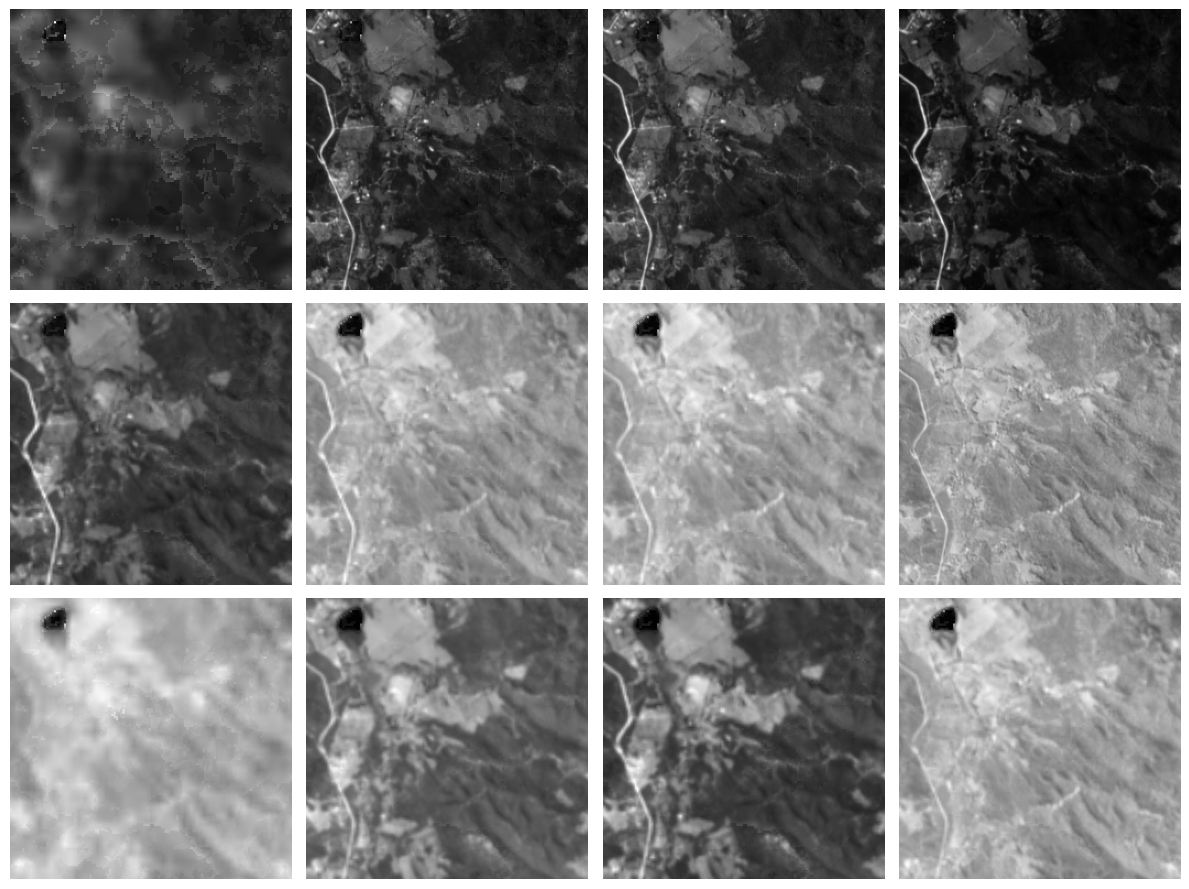

In [ ]:

subtile_composition.display_images(img)

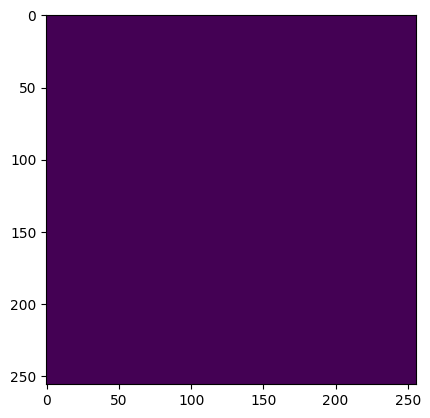

In [ ]:
plt.imshow(mask.squeeze())

In [ ]:
1/0

ZeroDivisionError: division by zero

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon





# Create a list of polygons
polygons = [
    Polygon([(0, 0), (0, 1), (1, 1), (1, 0)]),
    Polygon([(2, 2), (2, 3), (3, 3), (3, 2)])
]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': polygons})

# Print the GeoDataFrame
print(gdf)

0.16666666666666666

In [ ]:

train_dataset = data.ImageDataset(files = train_files, 
                            mask_filename = "masks/raster_aurb_032027.tif", 
                            num_classes = num_classes,
                            subtile_size = 10560/6,
                            mean = mean, 
                            std = std,
                            patch_size = (patch_size, patch_size),
                            stride = stride,
                            augment = data_aug)